In this file I read the CSV file given to load in a table called **raw_data** of **etl_workshop_first**.

In [ ]:
pip install -r requirements.txt

Import libraries:

In [1]:
import pandas
from sqlalchemy import create_engine

from connect_database import Connection_Postgres

Information about CSV file to load:

In [2]:
location_file = './data/candidates.csv'
raw_table_database = 'raw_applicant'
names_file = ['first_name', 'last_name', 'email', 'applicant_date', 'country', 'experience_year', 'seniority', 'technology', 'code_challenge_score', 'technical_interview_score']

Create connection:

In [3]:
# Create connection with PostgreSQL
connection = Connection_Postgres()
# Create connection with engine
connection_string = f"postgresql://{connection.connection_config['user']}:{connection.connection_config['password']}@{connection.connection_config['host']}:{connection.connection_config['port']}/{connection.connection_config['database']}"
postgres_engine = create_engine(connection_string)
# Read CSV file
dataframe = pandas.read_csv(location_file, names = names_file, delimiter=';', header=0)
# Load data obtained to SQL
dataframe.to_sql(raw_table_database, postgres_engine, if_exists='replace', index=False)
connection.log('Data loaded to {}: {} rows - {} columns.' .format(connection.connection_config['database'], dataframe.shape[0], dataframe.shape[1]))
# Close connection
connection.close_connection_database()

Data loaded:

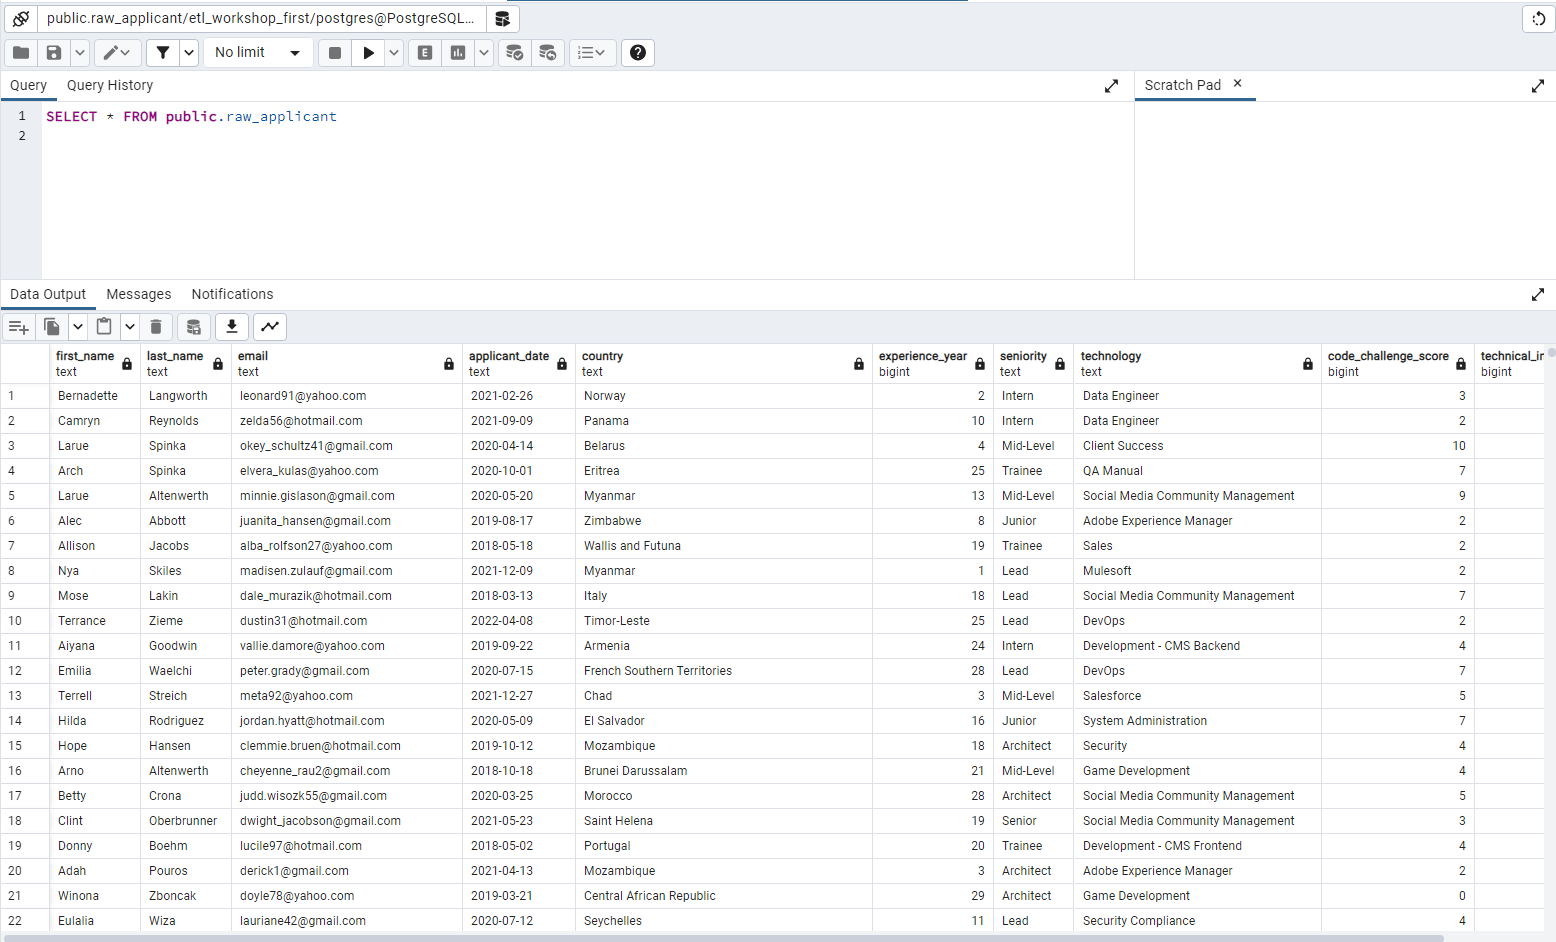